In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2019-01-03"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2019_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-01-03   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6900     Î∂ÅÍµ¨   7425     Î∂ÅÍµ¨   
1   2019-01-03     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6350     Î∂ÅÍµ¨   
2   2019-01-03    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2950     Î∂ÅÍµ¨   3398     Î∂ÅÍµ¨   
3   2019-01-03     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2350     Î∂ÅÍµ¨   2880     Î∂ÅÍµ¨   
4   2019-01-03    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7530     Î∂ÅÍµ¨   8650     Î∂ÅÍµ¨   
5   2019-01-03     ÎåÄÌåå                      1.0„éè   2680     Î∂ÅÍµ¨   4690     Î∂ÅÍµ¨   
6   2019-01-03   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6750     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
7   2019-01-03     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   4365     Î∂ÅÍµ¨   
8   2019-01-03     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
9   2019-01-03     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1450     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
10  2019-01-03      Î¨¥                   2.0„éè 1Í∞ú   1080     Î∂ÅÍµ¨   1180     Î∂ÅÍµ¨   
11  2019-01-03    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
12  2019-01-03     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2900     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
13  2019-01-03      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  14000     Î∂ÅÍµ¨  23670     Î∂ÅÍµ¨   
14  2019-01-03     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1480     Î∂ÅÍµ¨   2480     Î∂ÅÍµ¨   
15  2019-01-03  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3190     Î∂ÅÍµ¨   3495     Î∂ÅÍµ¨   
16  2019-01-03   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780     Î∂ÅÍµ¨  13850     Î∂ÅÍµ¨   
17  2019-01-03     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14000     Î∂ÅÍµ¨  16977     Î∂ÅÍµ¨   
18  2019-01-03    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
19  2019-01-03     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     Î∂ÅÍµ¨   1630     Î∂ÅÍµ¨   
20  2019-01-03     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
21  2019-01-03    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39500     Î∂ÅÍµ¨  44000     Î∂ÅÍµ¨   
22  2019-01-03    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
23  2019-01-03      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000     Î∂ÅÍµ¨  60500     Î∂ÅÍµ¨   
24  2019-01-03     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1200     Î∂ÅÍµ¨   1786     Î∂ÅÍµ¨   
25  2019-01-03     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     Î∂ÅÍµ¨    800     Î∂ÅÍµ¨   
26  2019-01-03    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4580     Î∂ÅÍµ¨   7250     Î∂ÅÍµ¨   
27  2019-01-03   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500     Î∂ÅÍµ¨   2500     Î∂ÅÍµ¨   
28  2019-01-03     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3130     Î∂ÅÍµ¨   3130     Î∂ÅÍµ¨   
29  2019-01-03    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  14840     Î∂ÅÍµ¨  17900     Î∂ÅÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    525   7.61%   7,163  
1   1150  22.12%   5,775  
2    448  15.19%   3,174  
3    530  22.55%   2,615  
4   1120  14.87%   8,090  
5   2010   75.0%   3,685  
6   3150  46.67%   8,325  
7   2865  191.0%   2,933  
8      4   0.59%     678  
9     10   0.69%   1,455  
10   100   9.26%   1,130  
11    70   2.04%   3,465  
12    80   2.76%   2,940  
13  9670  69.07%  18,835  
14  1000  67.57%   1,980  
15   305   9.56%   3,343  
16    70   0.51%  13,815  
17  2977  21.26%  15,489  
18   134   5.79%   2,383  
19    50   3.16%   1,605  
20    10   0.84%   1,195  
21  4500  11.39%  41,750  
22     0    0.0%   6,950  
23  6500  12.04%  57,250  
24   586  48.83%   1,493  
25     4    0.5%     798  
26  2670   58.3%   5,9

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2019-04-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2019_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-04-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6900     Î∂ÅÍµ¨   7425     Î∂ÅÍµ¨   
1   2019-04-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6350     Î∂ÅÍµ¨   
2   2019-04-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2350     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
3   2019-04-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8100     Î∂ÅÍµ¨   8300     Î∂ÅÍµ¨   
4   2019-04-11     ÎåÄÌåå                      1.0„éè   2280     Î∂ÅÍµ¨   2690     Î∂ÅÍµ¨   
5   2019-04-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9450     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
6   2019-04-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   4531     Î∂ÅÍµ¨   
7   2019-04-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
8   2019-04-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1450     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
9   2019-04-11      Î¨¥                   2.0„éè 1Í∞ú    980     Î∂ÅÍµ¨   1380     Î∂ÅÍµ¨   
10  2019-04-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
11  2019-04-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18000     Î∂ÅÍµ¨  28989     Î∂ÅÍµ¨   
12  2019-04-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1680     Î∂ÅÍµ¨   2380     Î∂ÅÍµ¨   
13  2019-04-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3115     Î∂ÅÍµ¨   3190     Î∂ÅÍµ¨   
14  2019-04-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780     Î∂ÅÍµ¨  13850     Î∂ÅÍµ¨   
15  2019-04-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  17500     Î∂ÅÍµ¨  20538     Î∂ÅÍµ¨   
16  2019-04-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
17  2019-04-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     Î∂ÅÍµ¨   1630     Î∂ÅÍµ¨   
18  2019-04-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
19  2019-04-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34900     Î∂ÅÍµ¨  46000     Î∂ÅÍµ¨   
20  2019-04-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   3980     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
21  2019-04-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000     Î∂ÅÍµ¨  60500     Î∂ÅÍµ¨   
22  2019-04-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2200     Î∂ÅÍµ¨   2280     Î∂ÅÍµ¨   
23  2019-04-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     Î∂ÅÍµ¨    800     Î∂ÅÍµ¨   
24  2019-04-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   3980     Î∂ÅÍµ¨   5800     Î∂ÅÍµ¨   
25  2019-04-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500     Î∂ÅÍµ¨   2500     Î∂ÅÍµ¨   
26  2019-04-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190     Î∂ÅÍµ¨   3130     Î∂ÅÍµ¨   
27  2019-04-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15773     Î∂ÅÍµ¨  17900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     525    7.61%   7,163  
1    1150   22.12%   5,775  
2     630   26.81%   2,665  
3     200    2.47%   8,200  
4     410   17.98%   2,485  
5     450    4.76%   9,675  
6    3031  202.07%   3,016  
7       4    0.59%     678  
8      10    0.69%   1,455  
9     400   40.82%   1,180  
10     70    2.04%   3,465  
11  10989   61.05%  23,495  
12    700   41.67%   2,030  
13     75    2.41%   3,153  
14     70    0.51%  13,815  
15   3038   17.36%  19,019  
16    634   34.91%   2,133  
17     50    3.16%   1,605  
18     10    0.84%   1,195  
19  11100   31.81%  40,450  
20   2970   74.62%   5,465  
21   6500   12.04%  57,250  
22     80    3.64%   2,240  
23      4     0.5%     798  
24   1820   45.73%   4,890  
25      0     0.0%   2,500  
26    940   42.92%   2,660  
27   2127   13.49%  16,837

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2019-07-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2019_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-07-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
1   2019-07-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6350     Î∂ÅÍµ¨   
2   2019-07-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2350     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
3   2019-07-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7150     Î∂ÅÍµ¨   9240     Î∂ÅÍµ¨   
4   2019-07-11     ÎåÄÌåå                      1.0„éè   2580     Î∂ÅÍµ¨   3290     Î∂ÅÍµ¨   
5   2019-07-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9400     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
6   2019-07-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   4531     Î∂ÅÍµ¨   
7   2019-07-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
8   2019-07-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1450     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
9   2019-07-11      Î¨¥                   2.0„éè 1Í∞ú   1350     Î∂ÅÍµ¨   1480     Î∂ÅÍµ¨   
10  2019-07-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
11  2019-07-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8180     Î∂ÅÍµ¨  13630     Î∂ÅÍµ¨   
12  2019-07-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  20000     Î∂ÅÍµ¨  38855     Î∂ÅÍµ¨   
13  2019-07-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2880     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
14  2019-07-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3190     Î∂ÅÍµ¨   3472     Î∂ÅÍµ¨   
15  2019-07-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780     Î∂ÅÍµ¨  13850     Î∂ÅÍµ¨   
16  2019-07-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14500     Î∂ÅÍµ¨  18230     Î∂ÅÍµ¨   
17  2019-07-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
18  2019-07-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     Î∂ÅÍµ¨   1630     Î∂ÅÍµ¨   
19  2019-07-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
20  2019-07-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34900     Î∂ÅÍµ¨  46000     Î∂ÅÍµ¨   
21  2019-07-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4980     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
22  2019-07-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000     Î∂ÅÍµ¨  60500     Î∂ÅÍµ¨   
23  2019-07-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1320     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
24  2019-07-11    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5000     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
25  2019-07-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     Î∂ÅÍµ¨    800     Î∂ÅÍµ¨   
26  2019-07-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6980     Î∂ÅÍµ¨   7250     Î∂ÅÍµ¨   
27  2019-07-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500     Î∂ÅÍµ¨   2500     Î∂ÅÍµ¨   
28  2019-07-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500     Î∂ÅÍµ¨   3130     Î∂ÅÍµ¨   
29  2019-07-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12973     Î∂ÅÍµ¨  17900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1475   19.87%   8,163  
1    1150   22.12%   5,775  
2     630   26.81%   2,665  
3    2090   29.23%   8,195  
4     710   27.52%   2,935  
5     500    5.32%   9,650  
6    3031  202.07%   3,016  
7       4    0.59%     678  
8      10    0.69%   1,455  
9     130    9.63%   1,415  
10     70    2.04%   3,465  
11   5450   66.63%  10,905  
12  18855   94.27%  29,428  
13   1100   38.19%   3,430  
14    282    8.84%   3,331  
15     70    0.51%  13,815  
16   3730   25.72%  16,365  
17    134    5.79%   2,383  
18     50    3.16%   1,605  
19     10    0.84%   1,195  
20  11100   31.81%  40,450  
21   1970   39.56%   5,965  
22   6500   12.04%  57,250  
23   1660  125.76%   2,150  
24   4900    98.0%   7,4

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2019-10-24"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2019_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-10-24   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
1   2019-10-24     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6350     Î∂ÅÍµ¨   
2   2019-10-24     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   4500     Î∂ÅÍµ¨   7500     Î∂ÅÍµ¨   
3   2019-10-24    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3000     Î∂ÅÍµ¨   3900     Î∂ÅÍµ¨   
4   2019-10-24     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2350     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
5   2019-10-24    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5980     Î∂ÅÍµ¨   8600     Î∂ÅÍµ¨   
6   2019-10-24     ÎåÄÌåå                      1.0„éè   2680     Î∂ÅÍµ¨   3600     Î∂ÅÍµ¨   
7   2019-10-24   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7900     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
8   2019-10-24     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   4531     Î∂ÅÍµ¨   
9   2019-10-24     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
10  2019-10-24     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1450     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
11  2019-10-24      Î¨¥                   2.0„éè 1Í∞ú   2880     Î∂ÅÍµ¨   3480     Î∂ÅÍµ¨   
12  2019-10-24    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
13  2019-10-24     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6580     Î∂ÅÍµ¨   6800     Î∂ÅÍµ¨   
14  2019-10-24      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18500     Î∂ÅÍµ¨  29067     Î∂ÅÍµ¨   
15  2019-10-24     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5480     Î∂ÅÍµ¨   7980     Î∂ÅÍµ¨   
16  2019-10-24  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3190     Î∂ÅÍµ¨   3486     Î∂ÅÍµ¨   
17  2019-10-24   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780     Î∂ÅÍµ¨  13850     Î∂ÅÍµ¨   
18  2019-10-24     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12500     Î∂ÅÍµ¨  14244     Î∂ÅÍµ¨   
19  2019-10-24    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
20  2019-10-24     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     Î∂ÅÍµ¨   1630     Î∂ÅÍµ¨   
21  2019-10-24     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
22  2019-10-24    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  46500     Î∂ÅÍµ¨  53000     Î∂ÅÍµ¨   
23  2019-10-24    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4980     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
24  2019-10-24      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000     Î∂ÅÍµ¨  60500     Î∂ÅÍµ¨   
25  2019-10-24     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1390     Î∂ÅÍµ¨   1850     Î∂ÅÍµ¨   
26  2019-10-24    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6500     Î∂ÅÍµ¨   7000     Î∂ÅÍµ¨   
27  2019-10-24     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     Î∂ÅÍµ¨    800     Î∂ÅÍµ¨   
28  2019-10-24    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6900     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
29  2019-10-24   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500     Î∂ÅÍµ¨   2500     Î∂ÅÍµ¨   
30  2019-10-24     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500     Î∂ÅÍµ¨   2880     Î∂ÅÍµ¨   
31  2019-10-24    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13533     Î∂ÅÍµ¨  13900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1475   19.87%   8,163  
1    1150   22.12%   5,775  
2    3000   66.67%   6,000  
3     900    30.0%   3,450  
4     630   26.81%   2,665  
5    2620   43.81%   7,290  
6     920   34.33%   3,140  
7    2000   25.32%   8,900  
8    3031  202.07%   3,016  
9       4    0.59%     678  
10     10    0.69%   1,455  
11    600   20.83%   3,180  
12     70    2.04%   3,465  
13    220    3.34%   6,690  
14  10567   57.12%  23,784  
15   2500   45.62%   6,730  
16    296    9.28%   3,338  
17     70    0.51%  1

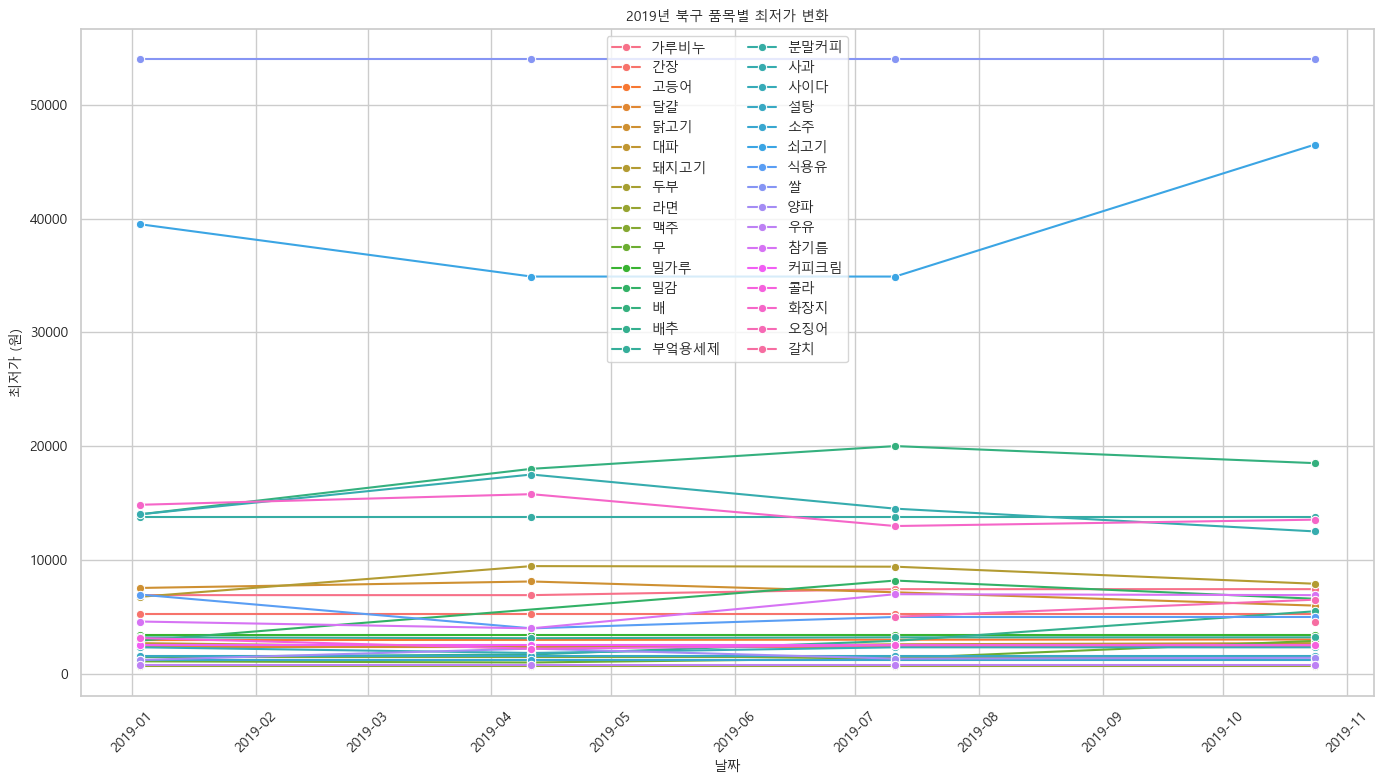

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2019_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2019_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2019_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2019_min.csv", index=False, encoding="utf-8-sig")

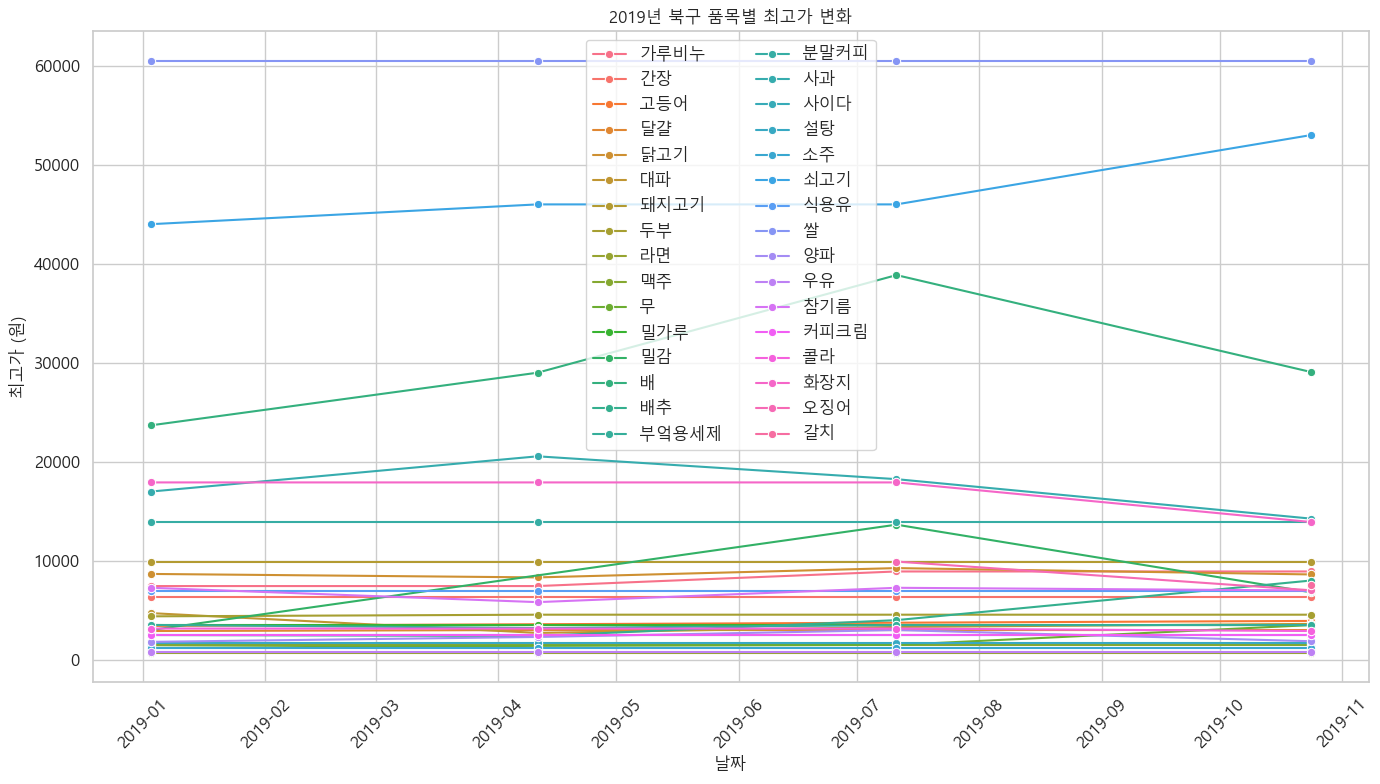

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2019_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2019_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2019_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2019_max.csv", index=False, encoding="utf-8-sig")